In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import time

Loading the test set: dataframe, predicted and actual $d_{hkl}$ distances

In [2]:
df = pd.read_csv('dftest.csv')
pred = np.load('2R5P2R54_12525_predtest.npy')
y = np.load('ytest.npy')

Plotting the learning curves

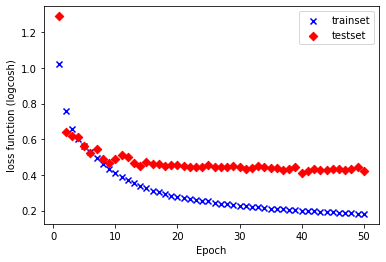

In [3]:
cf = pd.read_csv('2R5P2R54_12525.csv', header=None)
plt.figure()
plt.scatter(np.arange(1,cf.shape[0]+1), cf[0], marker='x', color='blue', label = 'trainset')
plt.scatter(np.arange(1,cf.shape[0]+1), cf[1], marker='D', color='red', label = 'testset')
plt.ylabel('loss function (logcosh)')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.show()

Computing the root-mean-squared error (RMSE) for each $d_{hkl}$ distance ($d_{100}$, $d_{010}$, $d_{001}$, $d_{110}$, $d_{101}$, and $d_{100}$):

In [4]:
((y - pred)**2).mean(axis=0)**0.5

array([2.89063521, 1.26114908, 0.77680825, 1.05200967, 0.70008624,
       0.72056411])

Calculating the global RMSE:

In [5]:
rmse = ((y - pred)**2).mean()**0.5

In [6]:
rmse

1.452914182138659

Checking the proportion of the assessments with an error within one RMSE:

In [7]:
(((y-pred)**2).mean(axis=1)**0.5 <= rmse).sum()/y.shape[0]

0.7855784899511136

Plots for interplanar distance $d_{100}$
RMSE 2.8906 angstrom
MAPE: 11.6694 %


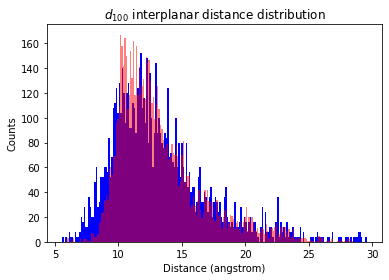

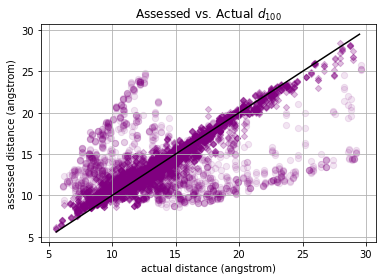

Plots for interplanar distance $d_{010}$
RMSE 1.2611 angstrom
MAPE: 8.6446 %


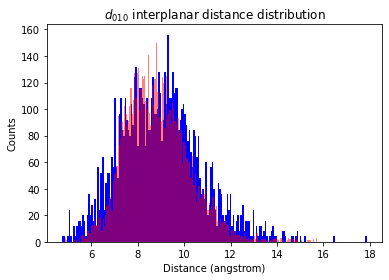

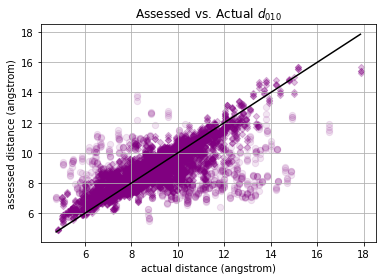

Plots for interplanar distance $d_{001}$
RMSE 0.7768 angstrom
MAPE: 9.181 %


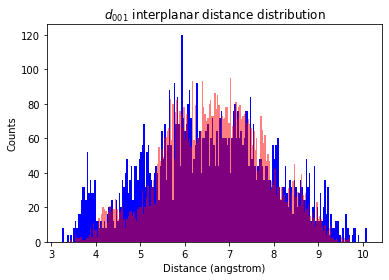

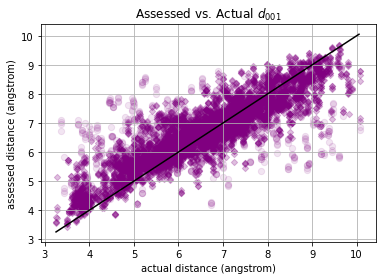

Plots for interplanar distance $d_{110}$
RMSE 1.052 angstrom
MAPE: 10.7352 %


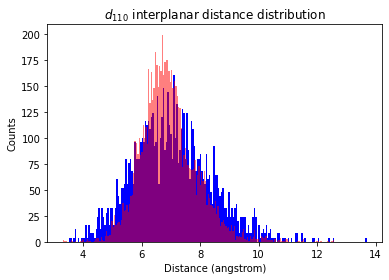

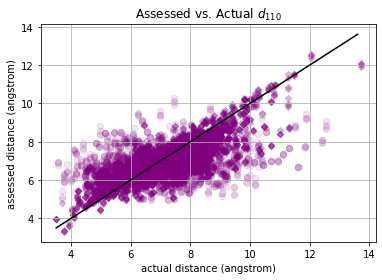

Plots for interplanar distance $d_{101}$
RMSE 0.7001 angstrom
MAPE: 9.7248 %


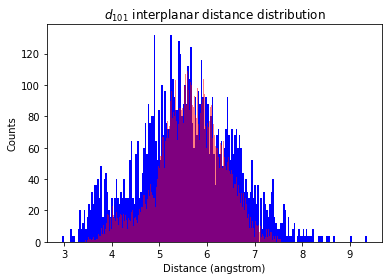

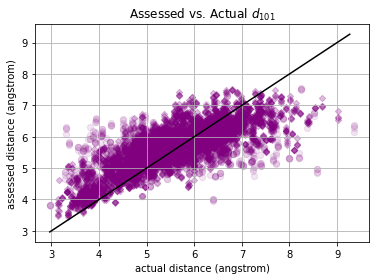

Plots for interplanar distance $d_{011}$
RMSE 0.7206 angstrom
MAPE: 10.7731 %


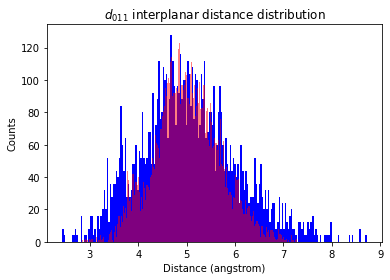

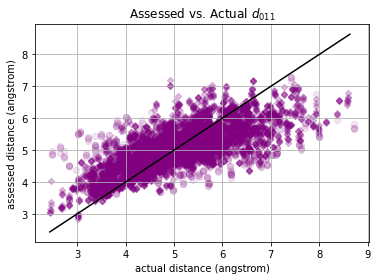

In [8]:
rmses = dict()

condl = ((y-pred)**2).mean(axis=1)**0.5 <= 1*rmse
condl = np.argwhere(condl)[:,0]

condg = ((y-pred)**2).mean(axis=1)**0.5 > 1*rmse
condg = np.argwhere(condg)[:,0]

dhkl = {0:r'$d_{100}$', 1:r'$d_{010}$', 2:r'$d_{001}$', 
        3:r'$d_{110}$', 4:r'$d_{101}$', 5:r'$d_{011}$'}

for j in range(y.shape[-1]):
    
    rmses[j] = ((y[:,j]-pred[:,j])**2).mean()**0.5
    mape = 100*abs(y[:,j]-pred[:,j])/(y[:,j])
    
    print('Plots for interplanar distance', dhkl[j])
    print('RMSE', rmses[j].round(4), 'angstrom')
    print('MAPE:',mape.mean().round(4), '%')

    df['y' + str(j)] = y[:,j]
    df['p' + str(j)] = pred[:,j]
    df['diff' + str(j)] = abs(y[:,j]-pred[:,j])

    plt.figure()
    plt.title(dhkl.get(j, None) + ' interplanar distance distribution')
    plt.hist(y[:,j], bins=200, color='blue')
    plt.hist(pred[:,j], bins = 200, color = 'red', alpha = 0.5 )
    plt.ylabel('Counts')
    plt.xlabel('Distance (angstrom)')
    plt.show()
    
    plt.figure()
    plt.title('Assessed vs. Actual ' + dhkl.get(j, None))
    plt.scatter(y[condl,j],pred[condl,j], marker='D', color='purple', s=20, alpha=0.25)
    plt.scatter(y[condg,j],pred[condg,j], marker='o', color='purple', s=40, alpha=0.10)
    plt.ylabel('assessed distance (angstrom)')
    plt.xlabel('actual distance (angstrom)')
    plt.grid(True)
    plt.plot(np.arange(y[:,j].min(), y[:,j].max(),0.1), np.arange(y[:,j].min(), y[:,j].max(),0.1), color='black')
    plt.show()
    

Plot of the error distribution

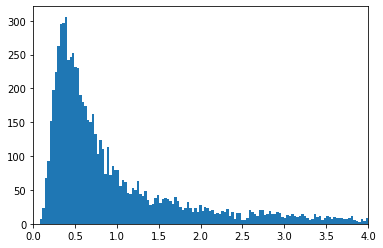

In [9]:
plt.figure()
plt.hist(((y-pred)**2).mean(axis=1)**0.5, 200)
plt.xlim(0,4)
plt.show()

Calculating the mean RMSE for each assessment. Appending the results in the dataframe

In [10]:
df['rmse'] = ((y-pred)**2).mean(axis=1)**0.5

unsam = df.shape[0]//4
df.iloc[:unsam,:].sort_values(by='rmse').to_csv('comparison_macro_predictions.csv', index=None)

In [11]:
df

,name,sgnum,y0,p0,diff0,y1,p1,diff1,y2,p2,...,y3,p3,diff3,y4,p4,diff4,y5,p5,diff5,rmse
0,1503539_macro,4,9.068000,17.001690,7.933690,8.374882,7.727621,0.647260,6.324033,6.401053,...,6.152397,6.831690,0.679294,5.187175,5.870613,0.683438,4.869094,4.796151,0.072943,3.273687
1,4030727_macro,2,9.696487,9.864430,0.167943,8.304249,8.885543,0.581294,8.093866,8.032600,...,5.161229,5.863902,0.702673,5.546024,5.561572,0.015548,4.859482,5.309819,0.450337,0.421635
2,7217234_macro,14,12.431258,11.428863,1.002395,9.565300,9.622488,0.057188,8.115941,7.618745,...,7.580862,7.243952,0.336911,6.321549,6.167628,0.153920,6.188502,5.695004,0.493497,0.522177
3,2009747_macro,19,17.191000,16.629559,0.561441,7.685000,7.513335,0.171665,6.612000,6.514828,...,7.015877,6.688496,0.327380,6.171272,5.963300,0.207972,5.012185,4.789035,0.223150,0.303961
4,2006727_macro,36,22.806000,22.848967,0.042967,6.450000,7.720030,1.270030,5.813000,5.081147,...,6.206552,7.079715,0.873163,5.632899,4.771781,0.861118,4.318105,3.943563,0.374542,0.795262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7359,8100968_0250,7,12.466900,14.215556,1.748657,9.288271,9.138971,0.149300,6.842392,6.125582,...,7.448331,7.107009,0.341322,5.998337,5.519310,0.479027,5.073155,4.814539,0.258615,0.817186
7360,2001549_0250,4,10.628001,11.611430,0.983430,8.259201,9.208504,0.949302,6.304469,6.765874,...,6.521506,7.028535,0.507029,5.422250,5.691793,0.269543,4.466952,5.267604,0.800652,0.713206
7361,1505279_0250,4,14.380490,13.924879,0.455611,7.141700,7.336293,0.194593,7.130306,6.998304,...,6.396344,6.354771,0.041574,6.127412,6.127739,0.000327,5.045911,4.921884,0.124027,0.216018
7362,4026999_0250,14,14.432100,13.345005,1.087095,10.637971,9.122931,1.515039,6.803035,7.008523,...,8.563086,7.428739,1.134347,6.153630,6.017248,0.136382,5.307688,5.213560,0.094128,0.897547
